In [1]:
#importations
import pandas as pd    

#initialisation des variables
fichier_passagers = "./Data/Titanic/passengers.csv"
fichier_survie = "./Data/Titanic/survival.csv"

In [2]:
#récupération des dataframes
df_passagers = pd.read_csv(fichier_passagers, encoding='latin1', dtype={'PassengerId': 'int', 'Pclass': 'int', 'Name': 'string', 'Sex': 'string', 'Age': 'Float64', 'Fare': 'Float64'})
df_survie = pd.read_csv(fichier_survie, encoding='latin1', dtype={'PassengerId': 'int', 'Survived': 'boolean'})

display(df_passagers)
display(df_survie)

,PassengerId,Pclass,Name,Sex,Age,Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.25
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.925
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1
4,5,3,"Allen, Mr. William Henry",male,35.0,8.05
...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,<NA>,8.05
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.25
1307,1308,3,"Ware, Mr. Frederick",male,<NA>,8.05


,PassengerId,Survived
0,1,False
1,2,True
2,3,True
3,4,True
4,5,False
...,...,...
1304,1305,False
1305,1306,True
1306,1307,False
1307,1308,False


In [3]:
# 1 - Joindre les 2 dataframes `df_passagers` et `df_survie`
df_titanic = df_passagers.join(df_survie, lsuffix='PassengerId', rsuffix='PassengerId')
df_titanic

,PassengerIdPassengerId,Pclass,Name,Sex,Age,Fare,PassengerIdPassengerId,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.25,1,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,2,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.925,3,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1,4,True
4,5,3,"Allen, Mr. William Henry",male,35.0,8.05,5,False
...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,<NA>,8.05,1305,False
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9,1306,True
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.25,1307,False
1307,1308,3,"Ware, Mr. Frederick",male,<NA>,8.05,1308,False


In [4]:
# 2 - Combien y a t-il de passagers dans notre dataframe ?
nb_passagers = len(df_titanic)
nb_passagers

1309

In [5]:
# 3 - Quelle est la moyenne du prix du trajet ?
moyenne_prix_trajet = df_titanic['Fare'].mean()
moyenne_prix_trajet

33.29547928134557

In [6]:
# 4 - Quels passagers ont payé les billets les plus chers ?
max_prix_trajet = df_titanic['Fare'].max()
df_passagers_ticket_le_plus_cher = df_titanic[df_titanic['Fare'] == max_prix_trajet]
df_passagers_ticket_le_plus_cher

,PassengerIdPassengerId,Pclass,Name,Sex,Age,Fare,PassengerIdPassengerId,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,512.3292,259,True
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,680,True
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,738,True
1234,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,512.3292,1235,True


In [7]:
# 5 - Quelles personnes n’ont pas payé leurs billets de 1ère classe ?
df_passagers_billet_premiere_classe_gratuit = df_titanic[(df_titanic['Pclass'] == 1) & (df_titanic['Fare'] == 0)]
df_passagers_billet_premiere_classe_gratuit

,PassengerIdPassengerId,Pclass,Name,Sex,Age,Fare,PassengerIdPassengerId,Survived
263,264,1,"Harrison, Mr. William",male,40.0,0.0,264,False
633,634,1,"Parr, Mr. William Henry Marsh",male,<NA>,0.0,634,False
806,807,1,"Andrews, Mr. Thomas Jr",male,39.0,0.0,807,False
815,816,1,"Fry, Mr. Richard",male,<NA>,0.0,816,False
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0,823,False
1157,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,<NA>,0.0,1158,False
1263,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,1264,False


In [8]:
# 6 - Quelle personne a obtenu le billet de première classe le moins cher ?
df_titanic_classe1 = df_titanic[df_titanic['Pclass'] == 1]
billet_classe_1_le_moins_cher = df_titanic_classe1[df_titanic_classe1['Fare'] > 0]['Fare'].min()
df_titanic_classe1[df_titanic_classe1['Fare'] == billet_classe_1_le_moins_cher]

,PassengerIdPassengerId,Pclass,Name,Sex,Age,Fare,PassengerIdPassengerId,Survived
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,5.0,873,False


In [9]:
# 7 - Quelle est la personne la plus jeune ? et la personne la plus âgée à bord du Titanic ?
min_age = df_titanic['Age'].min()
max_age = df_titanic['Age'].max()
df_passagers_les_plus_jeunes = df_titanic[df_titanic['Age'] == min_age]
df_passagers_les_plus_vieux = df_titanic[df_titanic['Age'] == max_age]

print(f"La personne la plus jeune est: {df_passagers_les_plus_jeunes['Name'].iloc[0]}")
display(df_passagers_les_plus_jeunes)
print(f"La personne la plus vieille est: {df_passagers_les_plus_vieux['Name'].iloc[0]}")
display(df_passagers_les_plus_vieux)

La personne la plus jeune est: Dean, Miss. Elizabeth Gladys Millvina""


,PassengerIdPassengerId,Pclass,Name,Sex,Age,Fare,PassengerIdPassengerId,Survived
1245,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,20.575,1246,True


La personne la plus vieille est: Barkworth, Mr. Algernon Henry Wilson


,PassengerIdPassengerId,Pclass,Name,Sex,Age,Fare,PassengerIdPassengerId,Survived
630,631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0,631,True


In [10]:
# 8 - Quel est le prix médian des billets de 1ère, 2ème ou 3ème classe ?
df_prix_median_par_classe = df_titanic.groupby(by='Pclass')['Fare'].median().reset_index()
display(df_prix_median_par_classe)

,Pclass,Fare
0,1,60.0
1,2,15.0458
2,3,8.05


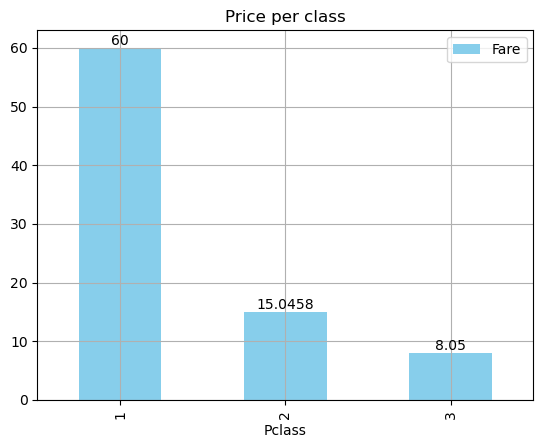

In [11]:
# Affichage du prix median par classe
ax = df_prix_median_par_classe.plot(kind='bar', x='Pclass', y='Fare', color='skyblue', title='Price per class', grid=True)
result = ax.bar_label(ax.containers[0])

In [12]:
# 9 - Quel est le pourcentage de femmes dans la liste des passagers ?
df_passagers_par_genre = df_titanic.groupby(by='Sex').size().reset_index(name='counts') #.reset_index()
df_passagers_par_genre

,Sex,counts
0,female,466
1,male,843


In [13]:
# Quel est le pourcentage de femmes dans la liste des passagers ?
df_passagers_par_genre['percentage'] = 100*df_passagers_par_genre['counts'] / df_passagers_par_genre['counts'].sum()
df_passagers_par_genre

,Sex,counts,percentage
0,female,466,35.599694
1,male,843,64.400306


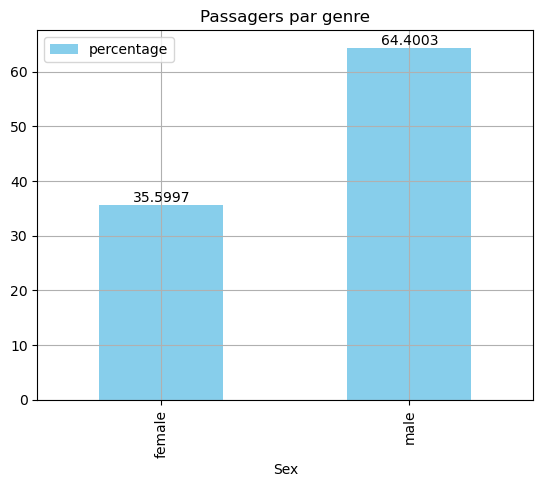

In [14]:
ax = df_passagers_par_genre.plot(kind='bar', x='Sex', y='percentage', color='skyblue', title='Passagers par genre', grid=True)
result = ax.bar_label(ax.containers[0])

In [15]:
# 10 - Quelle est la proportion des survivants ?
df_passagers_par_survie = df_titanic.groupby(by='Survived').size().reset_index(name='counts')
df_passagers_par_survie['Pourcentage survivants'] = 100*df_passagers_par_survie['counts'] / df_passagers_par_survie['counts'].sum()
df_passagers_par_survie

,Survived,counts,Pourcentage survivants
0,False,815,62.261268
1,True,494,37.738732


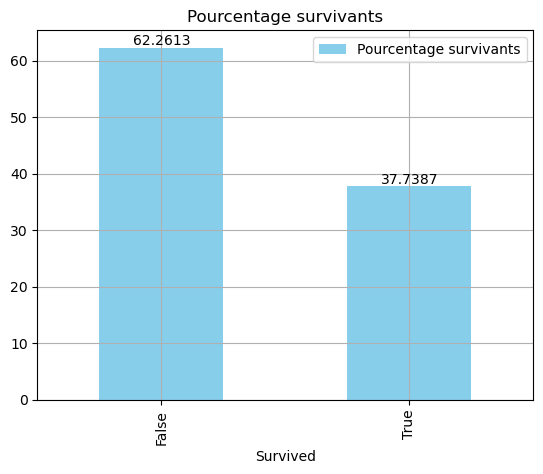

In [16]:
ax = df_passagers_par_survie.plot(kind='bar', x='Survived', y='Pourcentage survivants', color='skyblue', title='Pourcentage survivants', grid=True)
result = ax.bar_label(ax.containers[0])

In [17]:
# 11 - Quelle est la proportion des survivants par classe de transport ?
df_passagers_survie_par_classe = df_titanic.groupby(by=['Pclass', 'Survived']).size().reset_index(name='counts')
df_passagers_survie_par_classe['Pourcentage survie par classe'] = 100 * df_passagers_survie_par_classe['counts'] / df_passagers_survie_par_classe.groupby('Pclass')['counts'].transform('sum')
df_passagers_survie_par_classe

,Pclass,Survived,counts,Pourcentage survie par classe
0,1,False,137,42.414861
1,1,True,186,57.585139
2,2,False,160,57.761733
3,2,True,117,42.238267
4,3,False,518,73.060649
5,3,True,191,26.939351


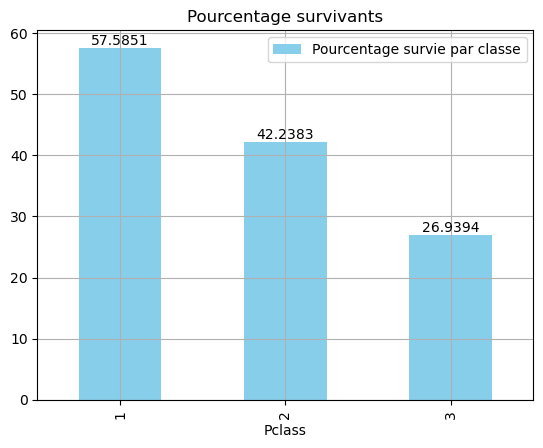

In [18]:
ax = df_passagers_survie_par_classe[df_passagers_survie_par_classe['Survived'] == True].plot(kind='bar', x='Pclass', y='Pourcentage survie par classe', color='skyblue', title='Pourcentage survivants', grid=True)
result = ax.bar_label(ax.containers[0])